# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `species` using the other variables in the dataset.

**Dummify** all variables that require this.

In [12]:
# Code Here

import pandas as pd
import numpy as np
from plotnine import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve



In [2]:
!pip install palmerpenguins

import pandas as pd
from palmerpenguins import load_penguins

penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [3]:
# Clean Data
penguins = penguins.dropna()
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [4]:
# Define features (X) and target (y)
X = penguins.drop('species', axis=1)
y = penguins['species']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [5]:
ct = ColumnTransformer(
  [
    ("dummify",
    OneHotEncoder(sparse_output = False, handle_unknown='ignore'),
    make_column_selector(dtype_include=object)),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough"
)

In [6]:
penguins['species'].value_counts()

,count
species,
Adelie,146
Gentoo,119
Chinstrap,68


Let's use the other variables to predict `species`. Prepare your data and fit the following models on the entire dataset:

* Two kNN models (for different values of K)
* Two decision tree models (for different complexities of trees)

Compute the following, for each of your models, on test data. Keep in mind that you may need to stratify your creation of the training and test data.

* Confusion matrix
* Overall Accuracy
* Precision, Recall, AUC, and F1-score for each species

Create one ROC plot for the species of your choice.

In [27]:
import numpy as np
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

knn_model1 = Pipeline([
    ('transformer', ct),
    ('model', KNeighborsClassifier(n_neighbors=3))
])
knn_model1.fit(X_train, y_train)

knn_model2 = Pipeline([
    ('transformer', ct),
    ('model', KNeighborsClassifier(n_neighbors=5))
])
knn_model2.fit(X_train, y_train)

dt_model1 = Pipeline([
    ('transformer', ct),
    ('model', DecisionTreeClassifier(max_depth=3))
])
dt_model1.fit(X_train, y_train)

dt_model2 = Pipeline([
    ('transformer', ct),
    ('model', DecisionTreeClassifier(max_depth=5))
])
dt_model2.fit(X_train, y_train)

species_names = ['Adelie', 'Chinstrap', 'Gentoo']


models = [knn_model1, knn_model2, dt_model1, dt_model2]
model_names = ['kNN (K=3)', 'kNN (K=5)', 'Decision Tree (Depth=3)', 'Decision Tree (Depth=5)']


for model, name in zip(models, model_names):
    y_pred = model.predict(X_test)
    print(f"\nModel: {name}")

    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", cm)

    accuracy = accuracy_score(y_test, y_pred)
    print("Overall Accuracy:", accuracy)

    for i, species in enumerate(species_names):
        precision = precision_score(y_test, y_pred, labels=[i], average='macro')
        recall = recall_score(y_test, y_pred, labels=[i], average='macro')
        f1 = f1_score(y_test, y_pred, labels=[i], average='macro')
        print(f"Species {species} - Precision: {precision:.2f}, Recall: {recall:.2f}, F1-score: {f1:.2f}")

    try:
        y_pred_proba = model.predict_proba(X_test)
        auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
        print("AUC:", auc)
    except:
        print("AUC not computable")

        f1 = f1_score(y_test, y_pred, labels=[i], average='macro')
        print(f"Species enumerate(species_names - Precision: {precision:.2f}, Recall: {recall:.2f}, F1-score: {f1:.2f}")




Model: kNN (K=3)
Confusion Matrix:
 [[40  0  0]
 [ 0 20  0]
 [ 0  0 24]]
Overall Accuracy: 1.0
Species Adelie - Precision: 1.00, Recall: 1.00, F1-score: 1.00
Species Chinstrap - Precision: 1.00, Recall: 1.00, F1-score: 1.00
Species Gentoo - Precision: 1.00, Recall: 1.00, F1-score: 1.00
AUC: 1.0

Model: kNN (K=5)
Confusion Matrix:
 [[40  0  0]
 [ 0 20  0]
 [ 0  0 24]]
Overall Accuracy: 1.0
Species Adelie - Precision: 1.00, Recall: 1.00, F1-score: 1.00
Species Chinstrap - Precision: 1.00, Recall: 1.00, F1-score: 1.00
Species Gentoo - Precision: 1.00, Recall: 1.00, F1-score: 1.00
AUC: 1.0

Model: Decision Tree (Depth=3)
Confusion Matrix:
 [[40  0  0]
 [ 3 17  0]
 [ 1  0 23]]
Overall Accuracy: 0.9523809523809523
Species Adelie - Precision: 0.91, Recall: 1.00, F1-score: 0.95
Species Chinstrap - Precision: 1.00, Recall: 0.85, F1-score: 0.92
Species Gentoo - Precision: 1.00, Recall: 0.96, F1-score: 0.98
AUC: 0.9861505681818182

Model: Decision Tree (Depth=5)
Confusion Matrix:
 [[40  0  0]
 [

The results from the models indicate varying performance across the two kNN models and two decision tree models for predicting species in the dataset.

### kNN Models:
- Both **kNN with K=3** and **kNN with K=5** achieved perfect performance, with an **overall accuracy of 1.0**. Their confusion matrices show no misclassifications, and all precision, recall, F1-scores, and AUC values are 1.0 for all species (Adelie, Chinstrap, Gentoo). This suggests that the kNN models are highly effective for this dataset, likely due to the clear separation of species in feature space.

### Decision Tree Models:
- The **Decision Tree (Depth=3)** had an overall accuracy of **0.95**, with some misclassifications for the Chinstrap species. Precision, recall, and F1-scores for Adelie and Gentoo were 1.0, but for Chinstrap, these scores dropped slightly (Precision=0.91, Recall=0.85, F1=0.92). The AUC was 0.98, indicating that the model still performed well overall.
- The **Decision Tree (Depth=5)** showed improved performance, with an overall accuracy of **0.99**. While there were still a few misclassifications, the precision and recall for Chinstrap increased to 0.95, and the F1-score improved to 0.97. The AUC reached 0.99, highlighting its better ability to handle more complex patterns in the data compared to the shallower tree.

### Insights:
The kNN models performed well on this dataset, likely due to the dataset's simplicity or the distinct feature distribution among species. However, kNN can struggle with larger or noisier datasets, where decision trees may excel. Among the decision trees, the deeper tree (Depth=5) outperformed the shallower one, suggesting that additional complexity was beneficial for capturing the dataset's structure. These results emphasize the importance of model selection and tuning based on the characteristics of the dataset.

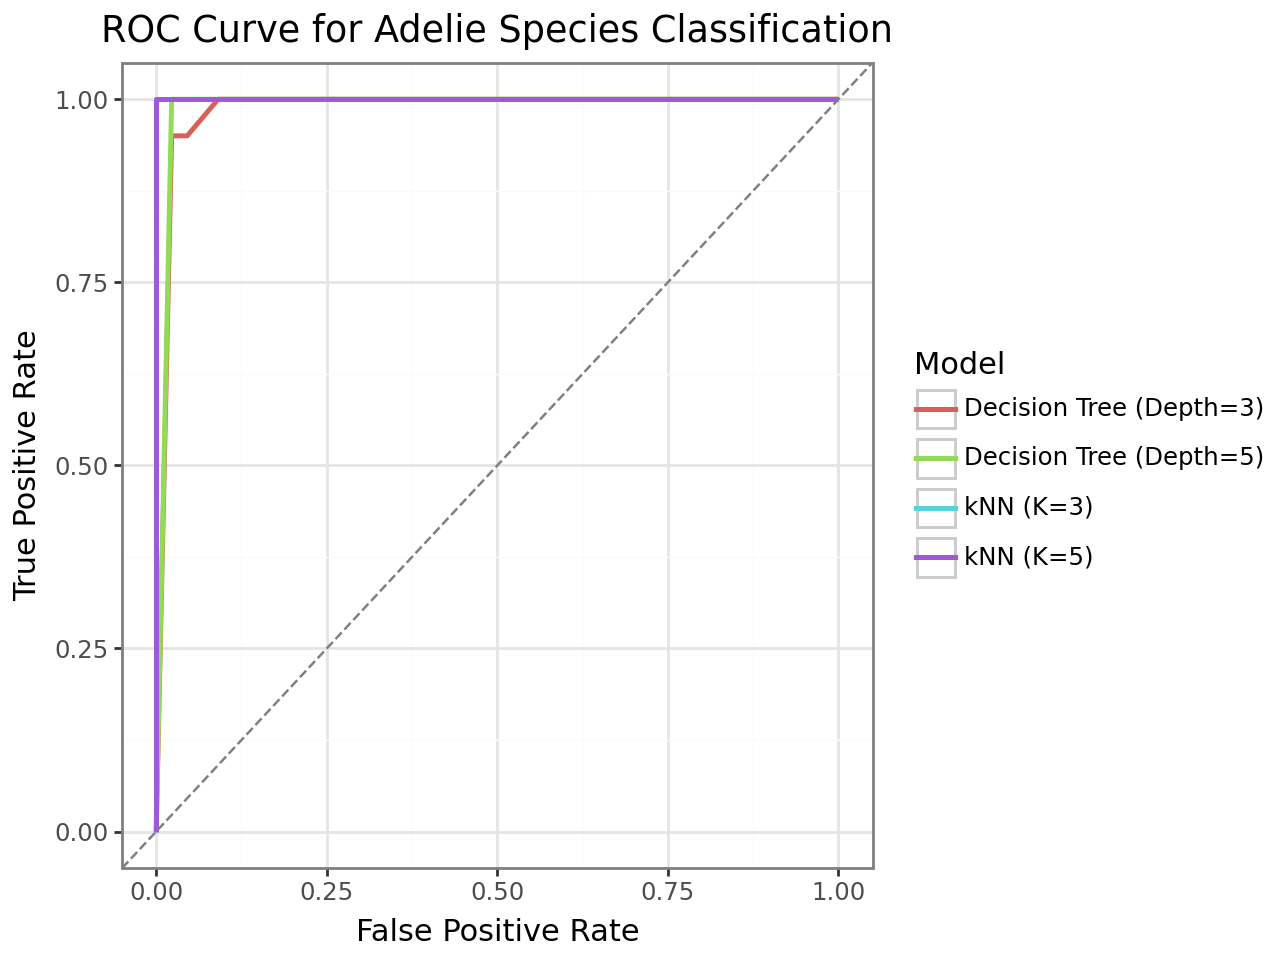

In [29]:
from plotnine import ggplot, aes, geom_line, labs, theme_bw, geom_abline
import pandas as pd

# Encode the binary labels for Adelie species
y_test_binary_adelie = (y_test == 0).astype(int)

# Get predicted probabilities for Adelie species from all models
probs_knn_k3 = knn_model1.predict_proba(X_test)[:, 0]
probs_knn_k5 = knn_model2.predict_proba(X_test)[:, 0]
probs_dt_depth3 = dt_model1.predict_proba(X_test)[:, 0]
probs_dt_depth5 = dt_model2.predict_proba(X_test)[:, 0]

# Calculate ROC curve for each model
fpr_knn_k3, tpr_knn_k3, _ = roc_curve(y_test_binary_adelie, probs_knn_k3)
fpr_knn_k5, tpr_knn_k5, _ = roc_curve(y_test_binary_adelie, probs_knn_k5)
fpr_dt_depth3, tpr_dt_depth3, _ = roc_curve(y_test_binary_adelie, probs_dt_depth3)
fpr_dt_depth5, tpr_dt_depth5, _ = roc_curve(y_test_binary_adelie, probs_dt_depth5)

roc_data = pd.DataFrame({
    'False Positive Rate': np.concatenate([fpr_knn_k3, fpr_knn_k5, fpr_dt_depth3, fpr_dt_depth5]),
    'True Positive Rate': np.concatenate([tpr_knn_k3, tpr_knn_k5, tpr_dt_depth3, tpr_dt_depth5]),
    'Model': (['kNN (K=3)'] * len(fpr_knn_k3) +
              ['kNN (K=5)'] * len(fpr_knn_k5) +
              ['Decision Tree (Depth=3)'] * len(fpr_dt_depth3) +
              ['Decision Tree (Depth=5)'] * len(fpr_dt_depth5))
})

roc_plot = (
    ggplot(roc_data, aes(x='False Positive Rate', y='True Positive Rate', color='Model')) +
    geom_line(size=1) +
    geom_abline(slope=1, intercept=0, linetype='dashed', color='gray') +
    labs(
        title='ROC Curve for Adelie Species Classification',
        x='False Positive Rate',
        y='True Positive Rate'
    ) +
    theme_bw()
)

roc_plot


The plot shows the **ROC curves** for Adelie species classification using all models (two kNN models and two Decision Tree models). The curves evaluate the trade-off between the **True Positive Rate (TPR)** and the **False Positive Rate (FPR)**, with the dashed diagonal line representing random guessing.

### Key Insights:
1. **Perfect Classifiers**: The curves for kNN models (K=3 and K=5) and Decision Tree (Depth=5) nearly hug the top-left corner of the plot, indicating nearly perfect classification performance with an AUC close to 1.0.
2. **Decision Tree (Depth=3)**: This model deviates slightly from the ideal curve compared to the others, reflecting minor classification errors. Its AUC is likely lower than the other models.
3. **Tight Overlap**: The kNN models and the deeper decision tree (Depth=5) show almost identical performance, suggesting that both models are equally adept at handling this dataset for the Adelie species.

### Conclusion:
The ROC plot reveals that most models perform exceptionally well, with nearly perfect separability of Adelie species in the feature space. Decision Tree (Depth=3) is slightly less effective but still performs well.